## Import Libraries

In [1]:
import pandas as pd
import pyreadr

## Read data files

In [2]:
promoter = pd.read_csv('promoter_importance_mean_new.txt', sep = '\t') #read DeepLIFT mean score file for HPA dataset
exp2_data = pd.read_pickle('expdata_2.pkl') #read expression level dataset for HPA dataset
cluster_color = pyreadr.read_r('cluster_color.Rds') #read tissue color file
cluster_color_df = cluster_color[None]

In [48]:
exp2_data.head(5)

,Name,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,Artery_Coronary,Artery_Tibial,Bladder,Brain_Amygdala,Brain_Anterior_cingulate_cortex_BA24,...,Skin_Sun_Exposed_Lower_leg,Small_Intestine_Terminal_Ileum,Spleen,Stomach,Testis,Thyroid,Uterus,Vagina,Whole_Blood,MedianExp
0,ENSG00000000003,21.7,1.374988,18.3,0.000000,-0.032276,-0.316353,1.442699,4.7,4.7,...,-0.048689,13.9,9.0,13.4,75.6,31.9,1.573926,1.511484,-5.185973,3.761285
1,ENSG00000000005,11.5,4.914338,0.2,-0.170091,0.828228,1.135013,-0.016521,0.2,0.2,...,3.111323,0.1,0.2,0.0,0.3,0.1,0.387482,0.116154,-0.798258,-1.201742
2,ENSG00000000419,45.7,0.089520,69.2,0.350891,0.215904,0.315835,0.118607,12.2,9.5,...,-0.008630,43.0,50.8,34.6,72.8,79.8,0.475972,0.262078,-1.857551,5.652486
3,ENSG00000000457,5.6,-0.209146,7.6,-0.130156,0.003656,0.051241,0.954447,3.8,4.9,...,0.456975,7.5,10.3,7.2,12.2,12.6,0.560195,0.458974,-0.797153,2.656725
4,ENSG00000000460,2.0,-0.084190,1.6,-0.046164,0.111601,0.194566,0.502007,1.4,1.3,...,0.156818,2.0,3.8,1.7,18.5,2.8,0.929086,0.591008,-1.212755,1.045443


## Convert dataframe structure to a suitable format for visualization function input

In [3]:
promoter = pd.read_csv('promoter_importance_mean_new.txt', sep = '\t')

transformed_df = pd.DataFrame()
for i in range(len(promoter.index)):
    promoter_df = pd.DataFrame(promoter[promoter.columns[1:]].T)
    promoter_df.columns = list(promoter[promoter.columns[0]])
    promoter_df = pd.DataFrame(promoter_df[promoter_df.columns[i]]).reset_index(level = 0)
    promoter_df.columns = ['','']
    transformed_df = pd.concat([transformed_df, promoter_df], axis = 0)

transformed_df.index = pd.concat([promoter[promoter.columns[0]]]*726).sort_index()
transformed_df = transformed_df.reset_index(level = 0)
transformed_df.columns = ['tissue_name','feat_name','shap_mean']
transformed_df

type_df = pd.DataFrame(['TF' for i in range(39204)], columns = ['Type'])
transformed_df = pd.concat([transformed_df, type_df], axis = 1)
transformed_df
#transformed_df.to_csv('deepLIFT_mean_pred.csv')
transformed_df.to_csv('deepLIFT_mean_pred_new.csv')

## get_exp_dl_df2 function

### This function returns a dataframe containing the gene name, gene ensembl ID and its expression

In [4]:
def get_exp_dl_df2(ensembl_val, feat_name):
    
    exp = exp2_data[exp2_data['Name'] == ensembl_val]
    exp = exp.T
    exp = exp.iloc[1:]
    exp.columns = ['expression_level']

    deeplift = transformed_df[transformed_df['feat_name'] == feat_name]
    deeplift = deeplift[['tissue_name','shap_mean']]
    deeplift = deeplift.set_index('tissue_name')
    
    exp_and_deeplift = pd.concat([exp, deeplift], axis = 1)
    
    return exp_and_deeplift

## Create dataframe for each TFs. 
### DataFrame contains expression levels and SHAP mean values

In [52]:
#Transcription factor dictionary
#format: {gene_name: gene_ensembl_ID}
TF_dict = {'PPARG':'ENSG00000132170', 
           'REST':'ENSG00000084093',
           'PTBP1':'ENSG00000011304',
           'METTL14':'ENSG00000145388',
           'DBP':'ENSG00000105516',
           'ETS1':'ENSG00000134954',
           'ETS2':'ENSG00000157557',
           'AR':'ENSG00000169083'
          } 

pparg = get_exp_dl_df2(TF_dict['PPARG'],'PPARG')
rest = get_exp_dl_df2(TF_dict['REST'],'REST')
ptbp1 = get_exp_dl_df2(TF_dict['PTBP1'],'PTBP1')
mettl14 = get_exp_dl_df2(TF_dict['METTL14'],'METTL14')
dbp = get_exp_dl_df2(TF_dict['DBP'],'DBP')
ets1 = get_exp_dl_df2(TF_dict['ETS1'],'ETS1')
ets2 = get_exp_dl_df2(TF_dict['ETS2'],'ETS2')
ar = get_exp_dl_df2(TF_dict['AR'],'AR')

TF_list = [pparg, rest, ptbp1, mettl14, dbp, ets1, ets2, ar]
TF_name_list = ['PPARG', 'REST', 'PTBP1', 'METTP14', 'DBP', 'ETS1', 'ETS2', 'AR']

## Correlation Plot (PPARG)

C:\Users\a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


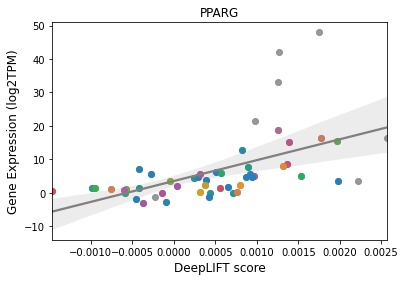

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import seaborn as sns

pparg = get_exp_dl_df2(TF_dict['PPARG'],'PPARG')
pparg = pparg[pparg['expression_level'] < 100]
pparg = pparg[pparg['shap_mean'] < 0.004]

x = pd.to_numeric(pparg['shap_mean'], downcast = "float")
y = pd.to_numeric(pparg['expression_level'], downcast = "float")

for i in range(len(x)-1):
    shap = x[x.index[i]]
    exp_lvl = y[y.index[i]]
    color = cluster_color_df[cluster_color_df['labels'] == x.index[i]]['color'].to_string()
    color = color.partition('#')[1] + color.partition('#')[2]
    if(shap < 0.002 and exp_lvl < 20):
        plt.plot(shap, exp_lvl,'o', color=color)

#create scatterplot with regression line
sns.regplot(x, y, color = 'grey')
plt.ylabel('Gene Expression (log2TPM)', fontsize = 12)
plt.xlabel('DeepLIFT score', fontsize = 12)
plt.title('PPARG')
plt.show()

## Correlation Plot (REST)

C:\Users\a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


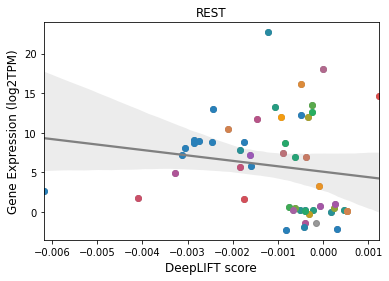

In [43]:
rest = get_exp_dl_df2(TF_dict['REST'],'REST')
rest = rest[rest['shap_mean']<0.002]

x = pd.to_numeric(rest['shap_mean'], downcast = "float")
y = pd.to_numeric(rest['expression_level'], downcast = "float")

for i in range(len(x)-1):
    shap = x[x.index[i]]
    exp_lvl = y[y.index[i]]
    color = cluster_color_df[cluster_color_df['labels'] == x.index[i]]['color'].to_string()
    color = color.partition('#')[1] + color.partition('#')[2]
    plt.plot(shap, exp_lvl,'o', color=color)

#create scatterplot with regression line
sns.regplot(x, y, color = 'grey')
plt.ylabel('Gene Expression (log2TPM)', fontsize = 12)
plt.xlabel('DeepLIFT score', fontsize = 12)
plt.title('REST')
plt.show()

## Correlation Plot (PTBP1)

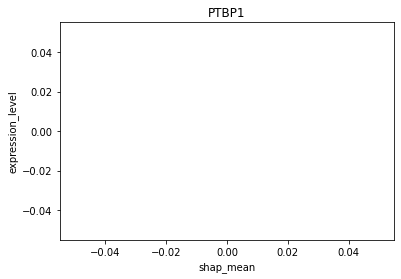

In [41]:
x = pd.to_numeric(ptbp1['shap_mean'], downcast = "float")
y = pd.to_numeric(ptbp1['expression_level'], downcast = "float")

for i in range(len(x)-1):
    shap = x[x.index[i]]
    exp_lvl = y[y.index[i]]
    color = cluster_color_df[cluster_color_df['labels'] == x.index[i]]['color'].to_string()
    color = color.partition('#')[1] + color.partition('#')[2]
    plt.plot(shap, exp_lvl,'o', color=color)

#create scatterplot with regression line
sns.regplot(x, y, color = 'grey')
plt.title('PTBP1')
plt.show()

## Correlation Plot (METTL14)

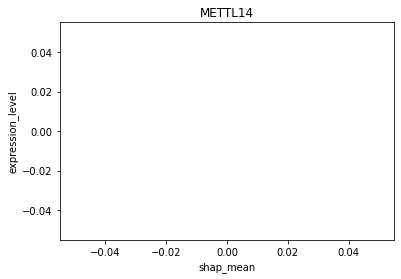

In [42]:
x = pd.to_numeric(mettl14['shap_mean'], downcast = "float")
y = pd.to_numeric(mettl14['expression_level'], downcast = "float")

for i in range(len(x)-1):
    shap = x[x.index[i]]
    exp_lvl = y[y.index[i]]
    color = cluster_color_df[cluster_color_df['labels'] == x.index[i]]['color'].to_string()
    color = color.partition('#')[1] + color.partition('#')[2]
    plt.plot(shap, exp_lvl,'o', color=color)

#create scatterplot with regression line
sns.regplot(x, y, color = 'grey')
ax= plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.ylabel('Gene Expression (log2TPM)', fontsize = 12)
plt.xlabel('DeepLIFT score', fontsize = 12)
plt.title('METTL14')
plt.show()

## Correlation Plot (DBP)

C:\Users\a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


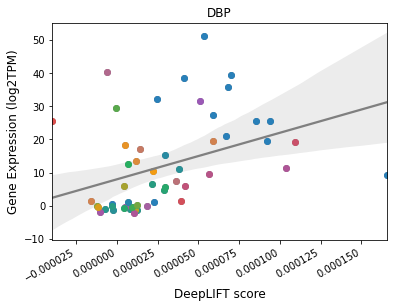

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import seaborn as sns

dbp = get_exp_dl_df2(TF_dict['DBP'],'DBP')
dbp = dbp[dbp['expression_level'] > -20]
dbp = dbp[dbp['shap_mean'] > -0.00005]

x = pd.to_numeric(dbp['shap_mean'], downcast = "float")
y = pd.to_numeric(dbp['expression_level'], downcast = "float")

for i in range(len(x)-1):
    shap = x[x.index[i]]
    exp_lvl = y[y.index[i]]
    color = cluster_color_df[cluster_color_df['labels'] == x.index[i]]['color'].to_string()
    color = color.partition('#')[1] + color.partition('#')[2]
    plt.plot(shap, exp_lvl,'o', color=color)
#plt.setp(plt.get_xticklabels(), rotation=30, horizontalalignment='right')
#create scatterplot with regression line
sns.regplot(x, y, color = 'grey')
ax= plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.ylabel('Gene Expression (log2TPM)', fontsize = 12)
plt.xlabel('DeepLIFT score', fontsize = 12)
plt.title('DBP')
plt.show()

## Correlation Plot (ETS1)

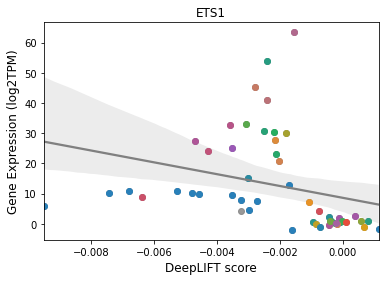

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import seaborn as sns

ets1 = get_exp_dl_df2(TF_dict['ETS1'],'ETS1')
ets1 = ets1[ets1['expression_level'] < 100]

x = pd.to_numeric(ets1['shap_mean'], downcast = "float")
y = pd.to_numeric(ets1['expression_level'], downcast = "float")

for i in range(len(x)-1):
    shap = x[x.index[i]]
    exp_lvl = y[y.index[i]]
    color = cluster_color_df[cluster_color_df['labels'] == x.index[i]]['color'].to_string()
    color = color.partition('#')[1] + color.partition('#')[2]
    plt.plot(shap, exp_lvl,'o', color=color)

#create scatterplot with regression line
sns.regplot(x, y, color = 'grey')
plt.ylabel('Gene Expression (log2TPM)', fontsize = 12)
plt.xlabel('DeepLIFT score', fontsize = 12)
plt.title('ETS1')
plt.show()

## Correlation Plot (ETS2)

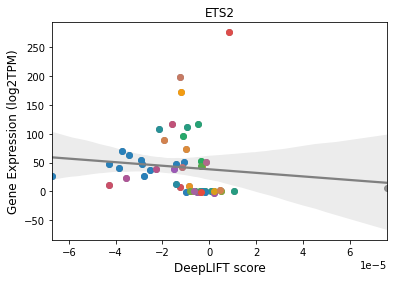

In [62]:
x = pd.to_numeric(ets2['shap_mean'], downcast = "float")
y = pd.to_numeric(ets2['expression_level'], downcast = "float")

for i in range(len(x)-1):
    shap = x[x.index[i]]
    exp_lvl = y[y.index[i]]
    color = cluster_color_df[cluster_color_df['labels'] == x.index[i]]['color'].to_string()
    color = color.partition('#')[1] + color.partition('#')[2]
    plt.plot(shap, exp_lvl,'o', color=color)

#create scatterplot with regression line
sns.regplot(x, y, color = 'grey')
plt.ylabel('Gene Expression (log2TPM)', fontsize = 12)
plt.xlabel('DeepLIFT score', fontsize = 12)
plt.title('ETS2')
plt.show()

## Correlation Plot (AR)

C:\Users\a\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


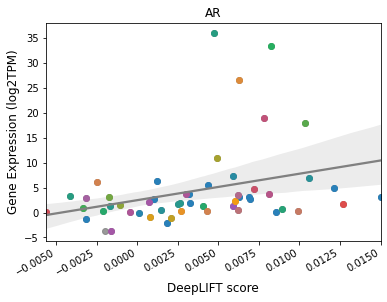

In [50]:
ar = get_exp_dl_df2(TF_dict['AR'],'AR')
ar = ar[ar['shap_mean'] < 0.02]

x = pd.to_numeric(ar['shap_mean'], downcast = "float")
y = pd.to_numeric(ar['expression_level'], downcast = "float")

for i in range(len(x)-1):
    shap = x[x.index[i]]
    exp_lvl = y[y.index[i]]
    color = cluster_color_df[cluster_color_df['labels'] == x.index[i]]['color'].to_string()
    color = color.partition('#')[1] + color.partition('#')[2]
    plt.plot(shap, exp_lvl,'o', color=color)

#create scatterplot with regression line
sns.regplot(x, y, color = 'grey')
ax= plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.ylabel('Gene Expression (log2TPM)', fontsize = 12)
plt.xlabel('DeepLIFT score', fontsize = 12)
plt.title('AR')
plt.show()